# Common term of control system calculation 
## ID5004W:AI in Predictive Maintenance, Reliability and Warranty

In [1]:
!pip install control

### Importing Library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control
import math
import sympy as sp
from sympy.integrals import laplace_transform,inverse_laplace_transform
from sympy.abc import t, s, a
from scipy.signal import tf2ss
from scipy.signal import ss2tf

### Transfer Function Declaration

In [7]:
k_const = 100
numo = [1, 1]
denom = [1, 110, 1000]

CS_final_equation = k_const*control.tf(numo , denom)
print(f'Transfer Function : {CS_final_equation}')

Transfer Function : 
   100 s + 100
------------------
s^2 + 110 s + 1000



### Laplace Transformation (MATLAB CODE)

In [8]:
# % Laplace Transform
# % https://in.mathworks.com/help/symbolic/sym.laplace.html
# syms a t y
# f = exp(-a*t) + exp(10*t);
# F = laplace(f)

### Inverse Laplace Tranformation  (MATLAB CODE)

In [9]:
# % Inverse Laplace Transform
# % https://in.mathworks.com/help/symbolic/sym.ilaplace.html
# syms s
# F = 1/s^2;
# f = ilaplace(F)

### Find pole and zeros of a transfer function

Pole : [-100.+0.j  -10.+0.j]
zero : [-1.+0.j]
Pole : [-100.+0.j  -10.+0.j]
zero : [-1.+0.j]


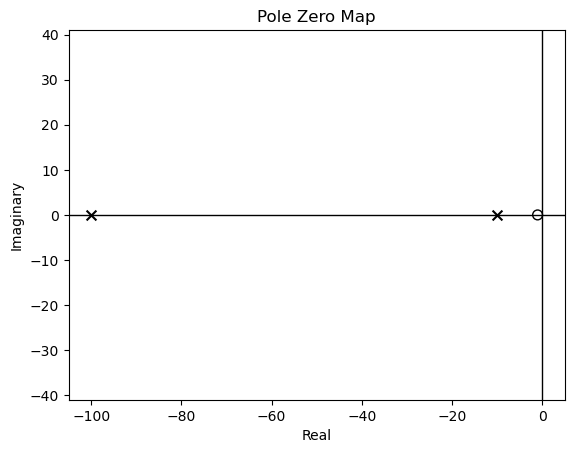

In [10]:
pole = control.pole(CS_final_equation)
zeros = control.zeros(CS_final_equation)
print(f'Pole : {pole}')
print(f'zero : {zeros}')

(p,z) = control.pzmap(CS_final_equation)
print(f'Pole : {p}')
print(f'zero : {z}')

### Type and Order of control system

### Initial and Final Value Theorem

### Time Constant of control system

### DC Gain of control system

In [11]:
DCGain = CS_final_equation.dcgain()
print(f'DC Gain : {DCGain}')

DC Gain : 0.1


### Sensitivity of control system

### General and Particular Solution

### Bode Plot


 100
------
s + 30

Zeros: [],
Poles: [-30.+0.j]


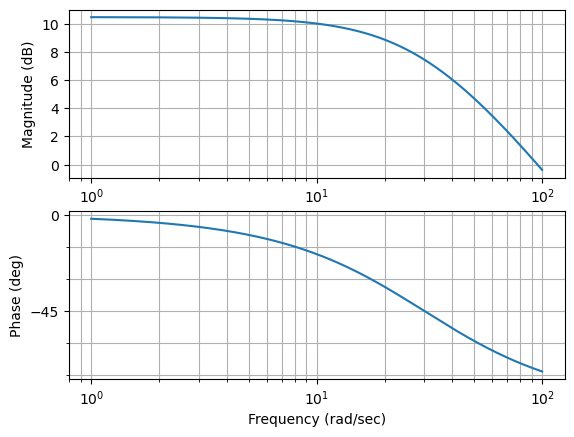

In [12]:
k_const = 100
numo = [0, 1]
denom = [1, 30]
CS_final_equation = k_const*control.tf(numo , denom)
print(CS_final_equation)
print(f'Zeros: {control.zeros(CS_final_equation)},\nPoles: {control.poles(CS_final_equation)}')
w, magnitude, phase = control.bode(CS_final_equation, dB=True)

In [13]:
(GM,PM,wg,wp) = control.margin(CS_final_equation)
print('GM [1 ( not dB )] = ' , f'{GM :.2f}')
print('PM [ deg ] = ' , f'{ PM :.2f}')
print('wg [ rad / s ] = ' , f'{wg :.2f}')
print('wp [ rad / s ] = ' , f'{wp :.2f}')

GM [1 ( not dB )] =  inf
PM [ deg ] =  107.46
wg [ rad / s ] =  nan
wp [ rad / s ] =  95.39


### Phase Margin and Gain Margin

GM [1 ( not dB )] =  2.00
PM [ deg ] =  21.39
wg [ rad / s ] =  1.00
wp [ rad / s ] =  0.68


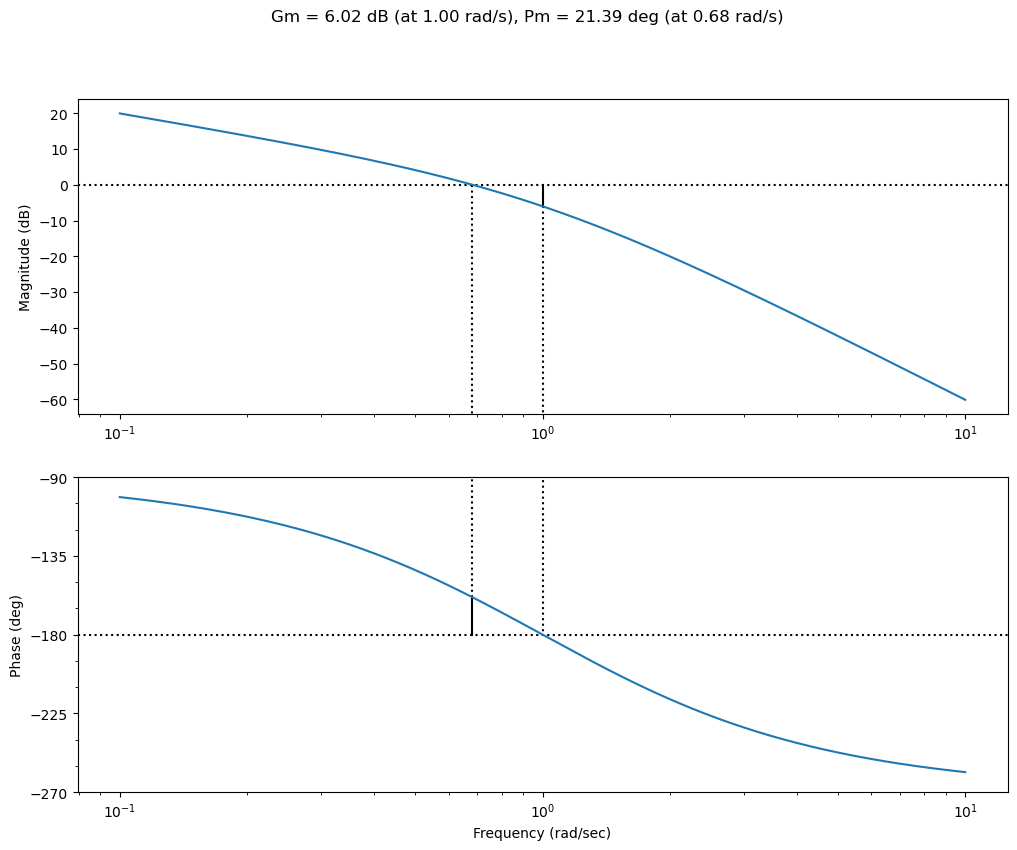

In [14]:
# %% Creating the loop transfer function :
Kp = 1
C = control.tf([ Kp ] ,[1])
P = control.tf([1] , [1 , 2 , 1 , 0])
L = control.series(C , P )
# %% Frequencies :
w0 = 0.1
w1 = 10
dw = 0.001
nw = int((w1-w0)/dw) + 1 # Number of points of freq
w = np.linspace(w0,w1,nw)
# %% Plotting :
plt.close('all')
plt.figure(1,figsize=(12,9))
(mag,phase_rad,w) = control.bode_plot(L,w,dB=True,deg = True,margins = True)
# %% Calculating stability margins and crossover frequencies :
(GM,PM,wg,wp) = control.margin(L )
# %% Printing :
print('GM [1 ( not dB )] = ' , f'{GM :.2f}')
print('PM [ deg ] = ' , f'{ PM :.2f}')
print('wg [ rad / s ] = ' , f'{wg :.2f}')
print('wp [ rad / s ] = ' , f'{wp :.2f}')
# %% Generating pdf file of the plotting figure :
plt.savefig('bode_with_stab_margins.pdf')

### Matlab code for getting phase and gain margins

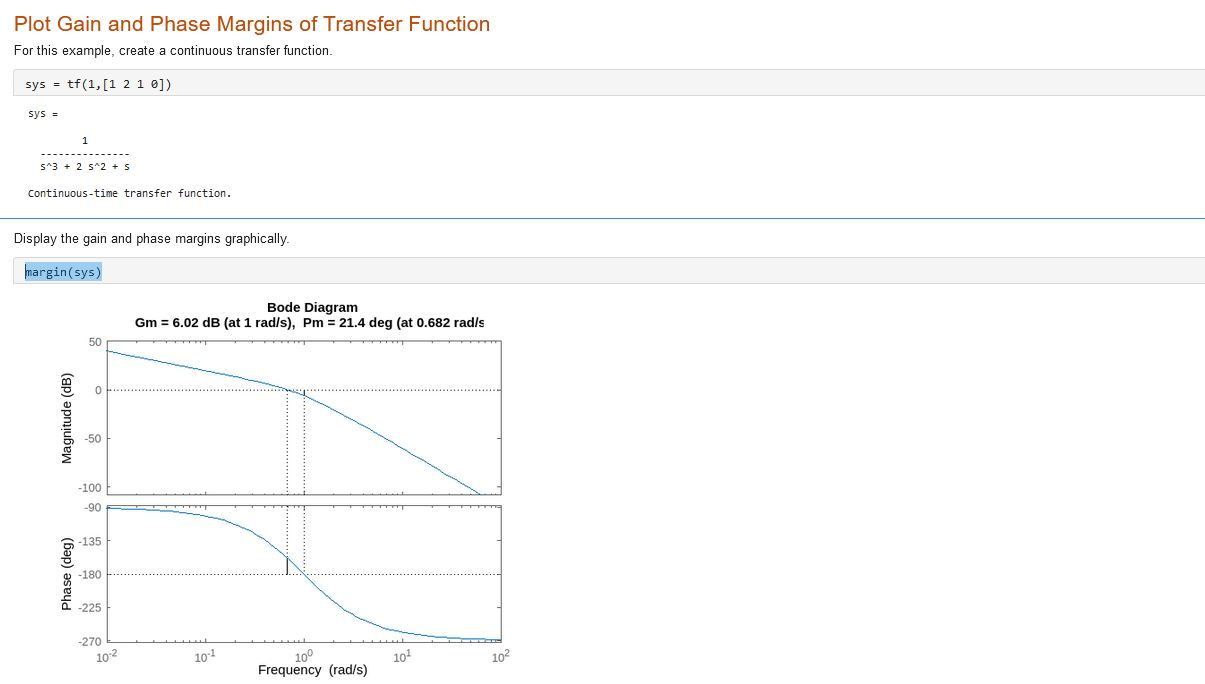

In [15]:
#https://in.mathworks.com/help/control/ref/dynamicsystem.margin.html
sys = tf(1,[1 2 1 0])
margin(sys)

SyntaxError: invalid syntax (897671264.py, line 2)

### Root Locus Plot (MATLAB)

In [16]:
# % Root Locus
# % https://in.mathworks.com/help/control/ref/dynamicsystem.rlocus.html

# sys = tf([2 5 1],[1 2 3]);
# rlocus(sys)

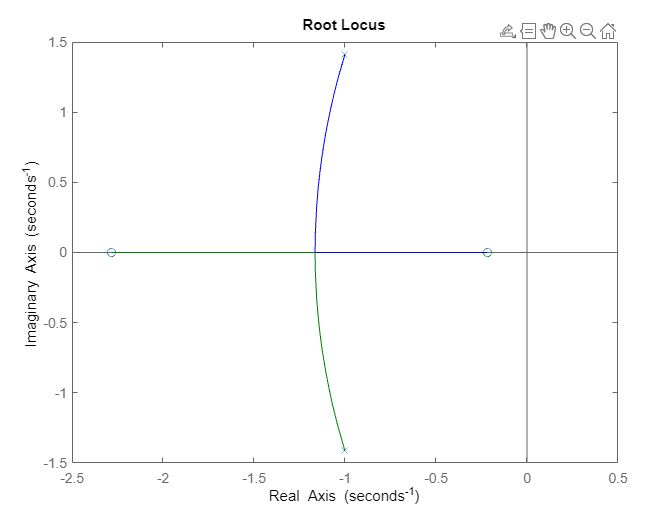

## Time Domain Specification
### Delay Time, Rise Time, Peak Time, Peak Overshoot, Settling Time

In [17]:
sys = control.TransferFunction([-1, 1], [1, 1, 1])
S = control.step_info(sys)
for k in S:
    print(f"{k}: {S[k]:3.4}")

RiseTime: 1.256
SettlingTime: 9.071
SettlingMin: 0.9011
SettlingMax: 1.208
Overshoot: 20.85
Undershoot: 27.88
Peak: 1.208
PeakTime: 4.187
SteadyStateValue: 1.0


### Steady State Error

## Frequency Domain Specification

###  Resonant Frequncy, Resonant Peak, Bandwidth, 

### State Space Solution

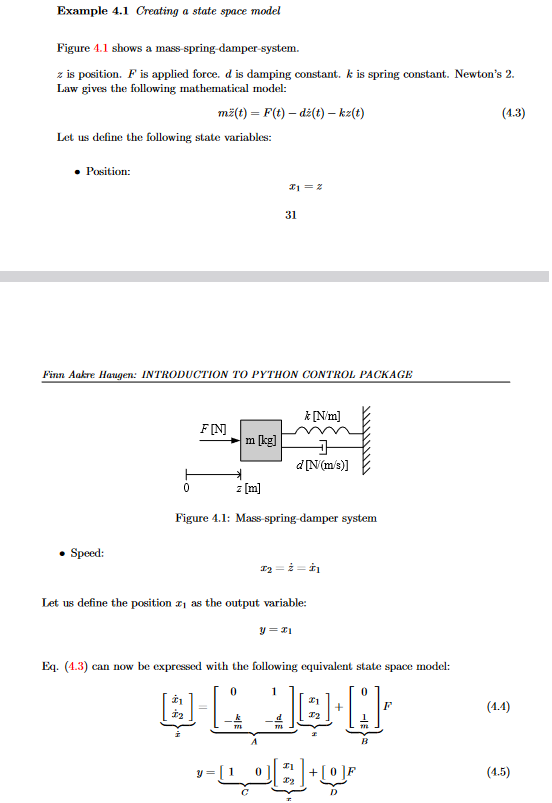

In [18]:
m = 10 # [ kg ]
k = 4 # [ N / m ]
d = 2 # [ N /( m / s )]
# %% System matrices as 2 D arrays :
A = np.array ([[0,1],[- k/m,-d/m]])
B = np.array ([[0],[1/m]])
C = np.array ([[1,0]])
D = np.array ([[0]])
# %% Creating the state space model :
S = control.ss(A , B , C , D )
# %% Displaying S :
print ('S = ',S)

S =  <LinearIOSystem>: sys[19]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.   1. ]
     [-0.4 -0.2]]

B = [[0. ]
     [0.1]]

C = [[1. 0.]]

D = [[0.]]



### State Space to Transfer Function

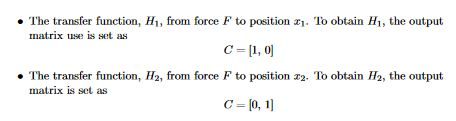

In [19]:
# %% Model params :
m = 10 # [ kg ]
k = 4 # [ N / m ]
d = 2 # [ N /( m / s )]
# %% System matrices as 2 D arrays :
A = np.array([[0,1],[-k/m,-d/m]])
B = np.array([[0],[1/m]])
D = np.array([[0]])
# %% Creating the state space model with x1 as output :
C1 = np.array([[1,0]])
S1 = control.ss(A,B,C1,D)
# %% Deriving transfer function H1 from S1 :
H1 = control.ss2tf(S1)
# %% Displaying H1 :
print('H1=',H1)
# %% Creating the state space model with x2 as output :
C2 = np.array([[0,1]])
S2 = control.ss(A,B,C2,D)
# %% Deriving transfer function H2 from S2 :
H2 = control.ss2tf(S2)
# %% Displaying H1 :
print('H2=',H2)

H1= 
2.776e-17 s + 0.1
-----------------
s^2 + 0.2 s + 0.4

H2= 
0.1 s + 1.665e-16
-----------------
s^2 + 0.2 s + 0.4



### State Space Matrix from Transfer Function

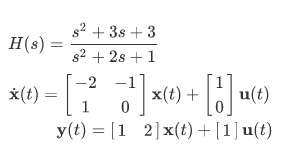

In [20]:
num = [1, 3, 3]
den = [1, 2, 1]
A, B, C, D = tf2ss(num, den)
print(f'A : {A} \n B : {B} \n C : {C} \n D : {D}')

A : [[-2. -1.]
 [ 1.  0.]] 
 B : [[1.]
 [0.]] 
 C : [[1. 2.]] 
 D : [[1.]]


### Transfer function from State Space Matrix

In [21]:
A = [[-2, -1], [1, 0]]
B = [[1], [0]] 
C = [[1, 2]]   
D = 1
ss2tf(A, B, C, D)

(array([[1., 3., 3.]]), array([1., 2., 1.]))

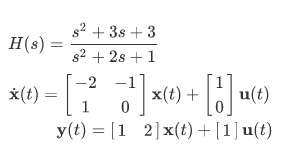

In [22]:
# Import necessary modules
import control
import numpy as np

# Define numerator and denominator of the transfer function
numerator = np.array([5, 2])
denominator = np.array([1, 4, 4])

# Create the transfer function H(s)
transfer_function = control.tf(numerator, denominator)

# Print the transfer function
print('H(s) =', transfer_function)

# Get step response information of the system
step_info = control.step_info(transfer_function)

# Print each attribute and its corresponding value
for key in step_info:
    print("{:<16} {:<15}".format(key, step_info[key]))


H(s) = 
   5 s + 2
-------------
s^2 + 4 s + 4

RiseTime         0.10466295877245661
SettlingTime     nan            
SettlingMin      0.5            
SettlingMax      1.0729994722115879
Overshoot        114.59989444231758
Undershoot       0              
Peak             1.0729994722115879
PeakTime         0.6279777526347396
SteadyStateValue 0.5            


### Controllability and observability 

In [23]:
import numpy as np
import control as ctrl

# Define your system matrices A, B, C, and D
# For example, let's consider a simple system with the following matrices:
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5],
              [6]])

C = np.array([[7, 8]])

D = np.array([[0]])

# Create a state-space model
sys = ctrl.ss(A, B, C, D)

# Check controllability
is_controllable = ctrl.ctrb(sys.A, sys.B)
controllability_rank = np.linalg.matrix_rank(is_controllable)

# Check observability
is_observable = ctrl.obsv(sys.A, sys.C)
observability_rank = np.linalg.matrix_rank(is_observable)

# Determine controllability and observability
if controllability_rank == sys.A.shape[0]:
    print("The system is controllable.")
else:
    print("The system is not controllable.")

if observability_rank == sys.A.shape[0]:
    print("The system is observable.")
else:
    print("The system is not observable.")


The system is controllable.
The system is observable.
